## Project Description

Given Singapore's climate, we are exposed to high temperatures, humidity and rainfalls. Rainy weather can cause shortness of breath especially when there are changes in humidity and temperature. Hence, the constant changes in weather conditions can be harmful to one's body as it affects the respiratory system and causes respiratory diseases such as bronchial asthmas, tracheitis, bronchitis and pneumonia.

Singapore’s world renowned healthcare system coupled with its relatively high hygiene standards should have effectively reduced the number of patients admitted for respiratory issues. However, Acute Upper Respiratory Tract Infections including Influenza were the top 4 conditions of Polyclinic Attendances from 2005 to 2019[1] and Pneumonia accounted for 20.7% of deaths in 2019[2].

As such, this project aims to investigate whether external factors like climate and seasonal changes have an obvious impact (if any) on disease transmission.

Hence, this project will analyze the effect the number of rainy days and humidity in a mmonth have on the number of respiratory cases in polyclinincs.

## **Importing necessary modules**

Here, we import the pandas library, the matplotlib library and seaborn library

In [1]:
### IMPORT THE REQUIRED MODULES

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.1f}'.format

# Plot static image in Jupyter notebook
%matplotlib inline

# Settings throughout the notebook
sns.set()

## **Importing the required data sets**

The datasets were collected from data.gov and converted into the CSV format to be used in Python.


In [2]:

# Title: 'Rainfall - Monthly Number of Rain Days'
# Description: 'The number of rain days (day with rainfall amount of 0.2mm or more)
#   in a month recorded at the Changi Climate Station.'
#  Coverage: '1982-01-01 to 2021-02-28'
rain_days_mthly_df = pd.read_csv('Data_sets/rainfall-monthly-number-of-rain-days.csv')
print(rain_days_mthly_df.shape)
rain_days_mthly_df.head()


(470, 2)


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [3]:
# Name: 'relative-humidity-monthly-mean'
# Title: 'Relative Humidity - Monthly Mean'
# Description: 'The monthly mean relative humidity recorded at the Changi Climate Station.'
#         Description: 'Percentages are expressed as a value over 100, i.e. "100" represents
#           100%'
#  Coverage: '1982-01-01 to 2021-02-28'
humidity_mthly_df = pd.read_csv('Data_sets/relative-humidity-monthly-mean.csv')

print(humidity_mthly_df.shape)
humidity_mthly_df.head()

(470, 2)


,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [4]:
# Description: 'Average daily polyclinic attendances for selected diseases - Acute Upper
#   Respiratory Tract infections, Acute Conjunctivitis, Acute Diarrhoea, Chickenpox
#   and HFMD( from 2018)'
#             Unit Of Measure: 'No. of Cases'
#     	January 1, 2012 to January 2, 2021
#       - 'Each epidemiological week begins on a Sunday and ends on Saturday.'
clinic_df = pd.read_csv('Data_sets/average-daily-polyclinic-attendances-for-selected-diseases.csv')
print(clinic_df.shape)
clinic_df.head()

(2037, 3)


,epi_week,disease,no._of_cases
0,2012-W01,Acute Upper Respiratory Tract infections,2932
1,2012-W01,Acute Conjunctivitis,120
2,2012-W01,Acute Diarrhoea,491
3,2012-W01,Chickenpox,18
4,2012-W02,Acute Upper Respiratory Tract infections,3189


##  Merging data

The data sets representing the number of rainy days *and* humidity levels will be merged together into one dataframe- weather_df.

The data in the dataframe will then be filetered to only contain data from January 2012 to December 2021.


In [5]:
# Lets merge the number of rainy days and humidity dfs and call them weather_df
# filter set to contain data from jan 2012 - dec 2021

weather_df = rain_days_mthly_df
weather_df['mean_rh'] =  humidity_mthly_df['mean_rh']
# weather_df.head()

# for time in weather_df['month']:
#     if '2021' in time:
#         display(weather_df[weather_df['month']==time].index)
# 2012 starts from index 360
# 2021 Jan is in 468

list_of_index = np.arange(360,468)
# print(list_of_index)
weather_filt_df = weather_df[weather_df.index.isin(list_of_index)]
# save this as a csv 
(weather_filt_df).to_csv('Data_sets/weather_filt_df.csv',index=False)

## Narrowing data

The dataframe containing the weather data that contains the number of rainy days and humidity levels are saved into a csv file. 

The dataframe is narrowed to only obtain the number of clinic walkins due to Acute Upper Respiratory Tract infections.


In [6]:
## Lets explore the clinic set a bit more

clinic_df.disease.unique()

## there are 5 unique diseases, lets look at the acute rep only 

resp_df = clinic_df[clinic_df['disease']=='Acute Upper Respiratory Tract infections']
resp_df = resp_df[['epi_week','no._of_cases']]
(resp_df).to_csv('Data_sets/resp_df.csv',index=False)

## Conversion of data

The number of respiratory cases in the data set will be converted into a monthly format as the weather information is presented in a monthly format.

In [7]:
## read in the previously filtered dataframe

resp_df = pd.read_csv('Data_sets/resp_df.csv')
resp_df.head()

,epi_week,no._of_cases
0,2012-W01,2932
1,2012-W02,3189
2,2012-W03,3185
3,2012-W04,4001
4,2012-W05,3356


In [8]:
## to convert the resp set to total number of cases per month
#       - 'Each epidemiological week begins on a Sunday and ends on Saturday.'


year_list = np.arange(2012,2021)
final_week_year = []
year_df = []

for year in year_list:
    for epi in resp_df['epi_week']:
        if str(year) in epi:
            year_df.append(epi)
    final_week_year.append(year_df[-1])
    
#**Note:** The variable, final_week_year, allows us to cross check the number of weeks in a year even though it is not constant
    
# display(year_df[-1])
display(final_week_year)

['2012-W52',
 '2013-W52',
 '2014-W53',
 '2015-W52',
 '2016-W52',
 '2017-W52',
 '2018-W52',
 '2019-W52',
 '2020-W53']

In [9]:
import calendar as cal
cal.setfirstweekday(2)

def week_calc(year):
    last = [];
    weeks = [];
    for i in range (1,13):
        days_in_a_mth = cal.monthcalendar(year,i)
        week_count = 0
        for week in days_in_a_mth:
#             print(week[0])
            if week[0]!=0:
                week_count = week_count + 1
        weeks.append(week_count)
    return weeks

my_week_list = [];
my_week_list_total = [];

for year in year_list:
    weeks_list = week_calc(year)
#     print(weeks_list)
    y = np.asarray(weeks_list).sum()
    my_week_list.append(weeks_list)
    my_week_list_total.append(y)
#     print(y)

print(final_week_year)
display(my_week_list_total)
display(my_week_list)

# my_week_list represents the number of epi weeks in a corresponding month for that particular year


['2012-W52', '2013-W52', '2014-W53', '2015-W52', '2016-W52', '2017-W52', '2018-W52', '2019-W52', '2020-W53']


[52, 52, 53, 52, 52, 52, 52, 52, 53]

[[4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4],
 [5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4],
 [5, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5],
 [4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5],
 [4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5, 4],
 [4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4],
 [5, 4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4],
 [5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4],
 [5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5]]

In [10]:
resp_df_aug = pd.read_csv('Data_sets/resp_df_aug.csv')
resp_df_aug.head()

,epi_week,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,1,2932,3022,2766,2822,2604,2721,3552,3478,3842
1,2,3189,3120,2805,2921,2775,2864,3632,3291,3585
2,3,3185,3133,3124,3035,2946,3060,4234,3391,3708
3,4,4001,3190,3288,2918,3111,3002,4048,3408,3811
4,5,3356,3036,3242,2931,3125,3521,3960,3428,4728


In [11]:
x = my_week_list[0]
print(x)
resp_df_aug['year_2012']
sum_list = []
sum_year_list = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12]);
sum_vert = [];
for cols in resp_df_aug.columns:
    sum_list = []
    sum_list.append(resp_df_aug[cols].iloc[0 : x[0]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[0] : x[0]+x[1]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[1]+x[0] : x[0]+x[1]+x[2]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[4]+x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]+x[5]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[5]+x[4]+x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[6]+x[5]+x[4]+x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[7]+x[6]+x[5]+x[4]+x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[8]+x[7]+x[6]+x[5]+x[4]+x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]+x[9]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[9]+x[8]+x[7]+x[6]+x[5]+x[4]+x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]+x[9]+x[10]].sum())
    sum_list.append(resp_df_aug[cols].iloc[x[10]+x[9]+x[8]+x[7]+x[6]+x[5]+x[4]+x[3]+x[2]+x[1]+x[0] : x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]+x[9]+x[10]+x[11]].sum())
    sum_year_list[cols] = sum_list;
    sum_vert.append(sum_list)

# print(np.asarray(sum_list).sum())
# print(sum_list)
cols_2_sel = ['year_2012', 'year_2013', 'year_2014',
       'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020']

resp_mthly = sum_year_list[cols_2_sel]
(resp_mthly).to_csv('resp_mthly.csv',index=False)

[4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4]


#### The number of respiratory cases has been converted from a weekly into a monthly format ####

In [12]:
weather_df = pd.read_csv('Data_sets/weather_filt_df.csv')
weather_df.head()
df_filt = pd.read_csv('Data_sets/df.csv')


## Data Visualization

The monthly respiratory cases are presented in the scatter plots and a box plot below. 


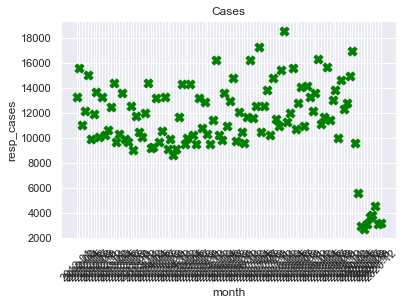

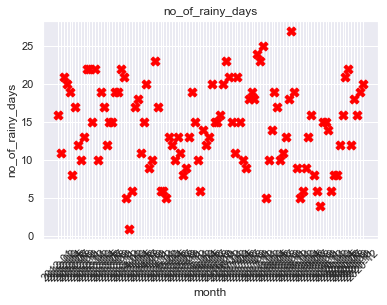

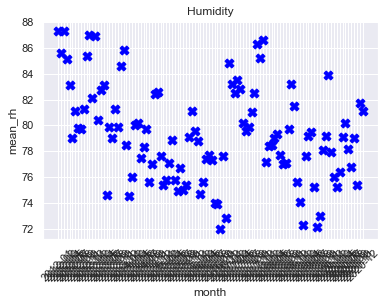

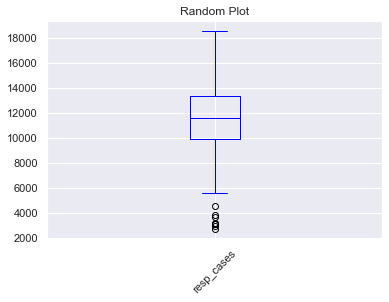

In [13]:
df_filt.plot(kind='scatter',
               x = 'month',
               y = 'resp_cases',
               marker = 'X',
               s = 80,
               alpha = 1,
               color = 'green',
               rot=45,
               title='Cases')
df_filt.plot(kind='scatter',
               x = 'month',
               y = 'no_of_rainy_days',
               marker = 'X',
               s = 80,
               alpha = 1,
               color = 'red',
               rot=45,
               title='no_of_rainy_days')
df_filt.plot(kind='scatter',
               x = 'month',
               y = 'mean_rh',
               marker = 'X',
               s = 80,
               alpha = 1,
               color = 'Blue',
               rot=45,
               title='Humidity')

df_filt.plot(kind='box',
               x = 'month',
               y = 'resp_cases',
               color = 'Blue',
               rot=45,
               title='Random Plot')


plt.show()

### Insights: 

- There are a group of outliers that belong to the number of clinic cases due to respiratory cases in 2020. 

- The outliers could be due to  high levels of social distancing during the covid-19 lockdown period that may have caused an overall steep decline in respiratory illness cases.

- This anomaly is a reason for us to eliminate the walkin cases from 2020 in our dataframe.


In [14]:
df_filt = pd.read_csv('Data_sets/df_aug.csv')

C:\Users\washe\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\washe\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\washe\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

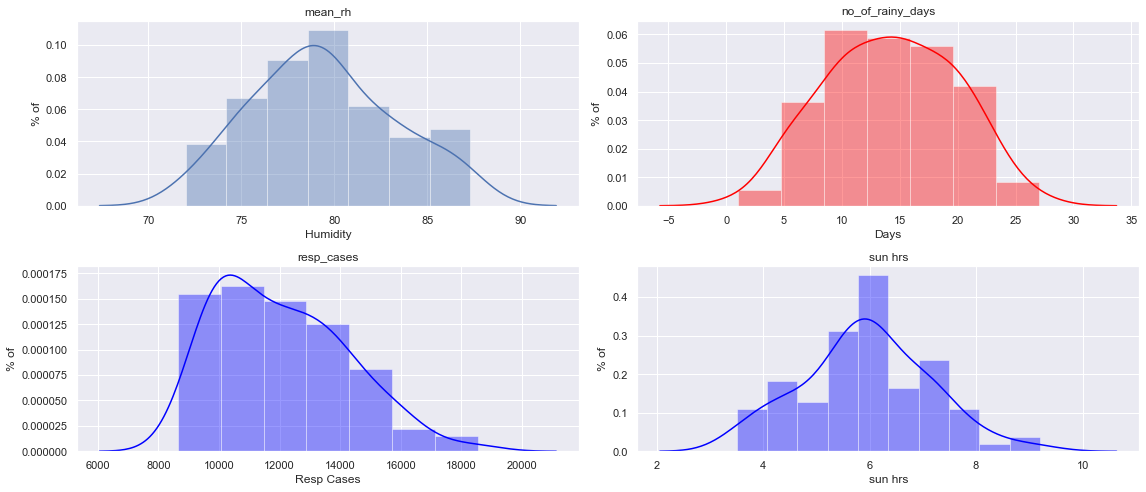

In [15]:
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


sns.distplot(df_filt.mean_rh, ax=ax1)
ax1.set_ylabel('% of')
ax1.set_xlabel('Humidity')
ax1.set_title('mean_rh')


sns.distplot(df_filt['no_of_rainy_days'], ax=ax2,color='red')
ax2.set_ylabel('% of')
ax2.set_xlabel('Days')
ax2.set_title('no_of_rainy_days')

sns.distplot(df_filt.resp_cases, ax=ax3,color='blue')
ax3.set_ylabel('% of')
ax3.set_xlabel('Resp Cases')
ax3.set_title('resp_cases')

sns.distplot(df_filt.sun, ax=ax4,color='blue')
ax4.set_ylabel('% of')
ax4.set_xlabel('sun hrs')
ax4.set_title('sun hrs')

plt.tight_layout()

### Insights: 
- Based on the graphs, we can concludee that HUMIDY AND NUMBER OF RAINY DAYS seem to follow a normal distribution. 
- However, the number of respiratory cases in Figure  representing the number of respiratory cases seem skewed. 
- This suggests that we may not be able to aaccurately model respiratory cases to the weather. 
- As such, we divide the monthly respiratory cases into 3 different classes: low, moderate and high.

In [16]:
quartile_1 = df_filt['resp_cases'].quantile(q=.35)
quartile_3 = df_filt['resp_cases'].quantile(q=.65)

cond1 = df_filt['resp_cases']>quartile_3
cond2 = df_filt['resp_cases']<quartile_1

def target_def(cases):
    if cases > quartile_3:
        target = 'High'
    elif cases < quartile_1:
        target = 'Low'
    else:
        target = 'Moderate'
    return target

df_filt['target'] = df_filt['resp_cases'].apply(target_def)

grpby = df_filt.groupby('target').count()
grpby


,month,no_of_rainy_days,mean_rh,resp_cases,sun
target,,,,,
High,34,34,34,34,34
Low,34,34,34,34,34
Moderate,28,28,28,28,28


In [17]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()
columns = ['resp_cases','mean_rh','no_of_rainy_days','sun']

scaled_df_filt = pd.DataFrame(my_scaler.fit_transform(df_filt[columns]), columns=columns)
scaled_df_filt

,resp_cases,mean_rh,no_of_rainy_days,sun
0,0.5,1.0,0.6,0.4
1,0.7,0.9,0.4,0.6
2,0.2,1.0,0.8,0.1
3,0.3,0.9,0.7,0.4
4,0.6,0.7,0.7,0.4
...,...,...,...,...
91,0.5,0.0,0.2,0.7
92,0.1,0.1,0.1,0.6
93,0.6,0.4,0.5,0.5
94,0.4,0.5,0.5,0.4


#### Creation of features

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

features = ['no_of_rainy_days', 'mean_rh','sun']

# df_x = df_filt[features]
df_x = scaled_df_filt[features]
df_y = df_filt['target']

df_x.head()
df_y.head()

0        High
1        High
2    Moderate
3    Moderate
4        High
Name: target, dtype: object

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.20, # 20% Testing Data
                                                    random_state=0)

x_train.head()
#y_train.head()

,no_of_rainy_days,mean_rh,sun
43,0.4,0.3,0.5
62,0.4,0.7,0.5
3,0.7,0.9,0.4
86,0.2,0.0,0.8
45,0.3,0.2,0.2


In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)  # use the entropy criteria for tree splitting.  You can use gini too.

dtree.fit(x_train, y_train)  # training the decision tree using the training data

print("Depth of Tree", dtree.tree_.max_depth) # This tree has a maximum depth of x

Depth of Tree 9


### Bar chart representing the monthly amount of sunlight hours, mean relative humidity and number of rainy days

[0.20380262 0.35844479 0.43775259]


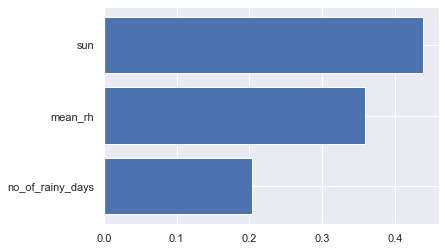

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.barh(features, dtree.feature_importances_)
print(dtree.feature_importances_)


### Insight: 

- Sunlight hours appears to have a higher importance, followed closely by the amount of humidity.

## Confusion Matrix

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


results = dtree.predict(x_test)
cm = confusion_matrix(y_test, results)


[[2 3 3]
 [1 5 0]
 [0 3 3]]


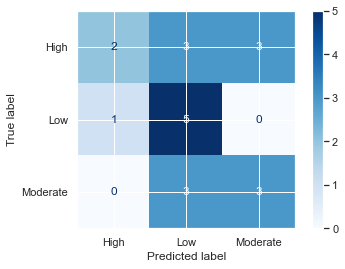

accuracy 0.5


In [23]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(dtree, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
print(disp.confusion_matrix)

plt.show()

print("accuracy", dtree.score(x_test, y_test))

### Insights: 

#### WE OBTAIN AN ACCURACY OF 
- #### 0.35 WHEN USING A FULL TREE (of depth 17) AND THE FULL FEATURES
- #### 0.40 WHEN WE NORMALIZE OUR FEATURES 
- #### 0.45 WHEN WE USE A PRUNED TREE (of depth 13) AND NORMALIZE OUR FEATURES 
- #### 0.50 WHEN WE USE A PRUNED TREE (of depth 9), NORMALIZE FEATURES AND ADD IN SUNSHINE HOURS AS ANOTHER FEATURE


### Insights:

- The accuracy achieved is higher than 0.3
- Therefore, the accuracy achieved is not entirely due to chance

### Possible reasons for inaccuracies:

- Lack of enough data sets used in training model
- Downsampling the monthly respiratory data sets to a weekly one to be used in tandem with the monthly weather information   dataset may have caused information to be lost.
- The addition of monthly mean sunshine hours may have improved the accuracy of the data.
- Weather data collected at the Changi weather station is no representative of the weather situation across Singapore.
- Due to the insufficient data, humidity levels and the amount of sunlight may be better indicators to predict the number of   walkin cases related to Acute Upper Respiratory Tract infections as compared to the number of rainy days.

### Conclusion:

- We expected there to be a correlation between the number of walkin cases due to Acute Upper Respiratory Tract infections and the number of rainy days.  
- There is a greater correlation between the number of walkin cases due to Acute Upper Respiratory Tract infections and humidity levels and the amount of sunlight as compared to the number of rainy days.